In [1]:
import os
import sys
import pickle
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(r'/davidb/yatirsolan/scripts/python/bio_utilities')
import phylogenetics
import databases

In [2]:
def find_the_file(database, patterns_file):
    files = list(filter(lambda file: database in file, patterns_file))
    if files:
        df = pd.read_table(files[0])
        df = df[~(df.patterns.str.contains('parameters:'))]
        return df
    else:
        return None
    
def concatenate(lst_of_databases):
    lst_of_databases = list(filter(lambda x: x is not None, lst_of_databases))
    if lst_of_databases:
        return pd.concat(lst_of_databases)
    else:
        return None

def func(main_dir):
    patterns_file = list()
    for file in os.walk(main_dir):
        if 'Sele' in file[0]:
            continue
        if file[0].endswith('review') :
            for review_file in file[2]:
                if review_file.endswith('_min_core_prts.tsv'):
                    patterns_file.append(os.path.join(file[0], review_file))

    mgnify_df = find_the_file('Mgnify', patterns_file)
    GEM_df = find_the_file('GEM', patterns_file)
    WGS_Metagenomes_df = find_the_file('WGS_Metagenomes', patterns_file)
    WGS_Uncultured_df = find_the_file('WGS_Uncultured', patterns_file)
    WGS_Genomes_df = find_the_file('WGS_Genomes', patterns_file)

    metagenomic_df = concatenate([mgnify_df, GEM_df, WGS_Metagenomes_df])
    genomic_df = concatenate([WGS_Uncultured_df, WGS_Genomes_df])

    return {'Mgnify':mgnify_df,
            'GEM':GEM_df,
            'WGS_Metagenomes':WGS_Metagenomes_df,
            'WGS_Uncultured':WGS_Uncultured_df,
            'WGS_Genomes':WGS_Genomes_df,
            'metagenomic':metagenomic_df, 
            'genomic':genomic_df}

T3SS = func(r'/davidb/yatirsolan/secretion_systems/T3SS/T3SS_vs_Metagenomics')
T4SSA = func(r'/davidb/yatirsolan/secretion_systems/T4SS/T4SSA_vs_Metagenomics')
T4SSB = func(r'/davidb/yatirsolan/secretion_systems/T4SS/T4SSB_vs_Metagenomics')
T6SSi = func(r'/davidb/yatirsolan/secretion_systems/T6SS/T6SSi_vs_Metagenomics')
T6SSii = func(r'/davidb/yatirsolan/secretion_systems/T6SS/T6SSii_vs_Metagenomics')
T6SSiii = func(r'/davidb/yatirsolan/secretion_systems/T6SS/T6SSiii_vs_Metagenomics')

In [3]:
T3SS_metagenomic_total = len(T3SS.get('metagenomic'))
T3SS_genomic_total = len(T3SS.get('genomic'))
T3SS_total = T3SS_metagenomic_total + T3SS_genomic_total

print('T3SS total -', T3SS_total)
print('T3SS metagenomic only -', T3SS_metagenomic_total)
print('T3SS genomic only -', T3SS_genomic_total)
print('Mgnify -', len(T3SS.get('Mgnify')), '\n'
      'GEM -', len(T3SS.get('GEM')), '\n'
      'WGS_Metagenomes -', len(T3SS.get('WGS_Metagenomes')), '\n'
      'WGS_Uncultured -', len(T3SS.get('WGS_Uncultured')), '\n'
      'WGS_Genomes -', len(T3SS.get('WGS_Genomes'))) 
print('--------------')
print('T3SS metagenomic only -', T3SS_metagenomic_total)
print('T36SS genomic only -', T3SS_genomic_total)

T3SS total - 390356
T3SS metagenomic only - 1472
T3SS genomic only - 388884
Mgnify - 721 
GEM - 422 
WGS_Metagenomes - 329 
WGS_Uncultured - 56 
WGS_Genomes - 388828
--------------
T3SS metagenomic only - 1472
T36SS genomic only - 388884


In [4]:
T4SSA_metagenomic_total = len(T4SSA.get('metagenomic'))
T4SSA_genomic_total = len(T4SSA.get('genomic'))
T4SSA_total = T4SSA_metagenomic_total + T4SSA_genomic_total

print('T4SSA total -', T4SSA_total)
print('T4SSA metagenomic only -', T4SSA_metagenomic_total)
print('T4SSA genomic only -', T4SSA_genomic_total)
# print()
print('Mgnify -', len(T4SSA.get('Mgnify')), '\n'
      'GEM -', len(T4SSA.get('GEM')), '\n'
      'WGS_Metagenomes -', len(T4SSA.get('WGS_Metagenomes')), '\n'
      'WGS_Uncultured -', len(T4SSA.get('WGS_Uncultured')), '\n'
      'WGS_Genomes -', len(T4SSA.get('WGS_Genomes')), '\n--------------') 

T4SSB_metagenomic_total = len(T4SSB.get('metagenomic'))
T4SSB_genomic_total = len(T4SSB.get('genomic'))
T4SSB_total = T4SSB_metagenomic_total + T4SSB_genomic_total
print('T4SSB total -', T4SSB_total)
print('T4SSB metagenomic only -', T4SSB_metagenomic_total)
print('T4SSB genomic only -', T4SSB_genomic_total)
# print()
print('Mgnify -', len(T4SSB.get('Mgnify')), '\n'
      'GEM -', len(T4SSB.get('GEM')), '\n'
      'WGS_Metagenomes -', len(T4SSB.get('WGS_Metagenomes')), '\n'
      'WGS_Uncultured -', len(T4SSB.get('WGS_Uncultured')), '\n'
      'WGS_Genomes -', len(T4SSB.get('WGS_Genomes'))) 
print('--------------')
print('T4SS metagenomic only -', T4SSA_metagenomic_total + T4SSB_metagenomic_total)
print('T4SS genomic only -', T4SSA_genomic_total + T4SSB_genomic_total)

T4SSA total - 9083
T4SSA metagenomic only - 449
T4SSA genomic only - 8634
Mgnify - 234 
GEM - 117 
WGS_Metagenomes - 98 
WGS_Uncultured - 13 
WGS_Genomes - 8621 
--------------
T4SSB total - 1374
T4SSB metagenomic only - 69
T4SSB genomic only - 1305
Mgnify - 30 
GEM - 19 
WGS_Metagenomes - 20 
WGS_Uncultured - 8 
WGS_Genomes - 1297
--------------
T4SS metagenomic only - 518
T4SS genomic only - 9939


In [5]:
T6SSi_metagenomic_total = len(T6SSi.get('metagenomic'))
T6SSi_genomic_total = len(T6SSi.get('genomic'))
T6SSi_total = T6SSi_metagenomic_total + T6SSi_genomic_total

print('T6SSi total -', T6SSi_total)
print('T6SSi metagenomic only -', T6SSi_metagenomic_total)
print('T6SSi genomic only -', T6SSi_genomic_total)
print('Mgnify -', len(T6SSi.get('Mgnify')), '\n'
      'GEM -', len(T6SSi.get('GEM')), '\n'
      'WGS_Metagenomes -', len(T6SSi.get('WGS_Metagenomes')), '\n'
      'WGS_Uncultured -', len(T6SSi.get('WGS_Uncultured')), '\n'
      'WGS_Genomes -', len(T6SSi.get('WGS_Genomes')), '\n--------------') 

T6SSii_total = len(T6SSii.get('genomic'))
T6SSii_genomic_total = T6SSii_total

print('T6SSii total -', T6SSii_total)
print('WGS_Genomes -', len(T6SSii.get('WGS_Genomes')), '\n--------------') 

T6SSiii_metagenomic_total = len(T6SSiii.get('metagenomic'))
T6SSiii_genomic_total = len(T6SSiii.get('genomic'))
T6SSiii_total = T6SSiii_metagenomic_total + T6SSiii_genomic_total

print('T6SSiii total -', T6SSiii_total)
print('T6SSiii metagenomic only -', T6SSiii_metagenomic_total)
print('T6SSiii genomic only -', T6SSiii_genomic_total)
print('Mgnify -', len(T6SSiii.get('Mgnify')), '\n'
      'GEM -', len(T6SSiii.get('GEM')), '\n'
      'WGS_Metagenomes -', len(T6SSiii.get('WGS_Metagenomes')), '\n'
      'WGS_Uncultured -', len(T6SSiii.get('WGS_Uncultured')), '\n'
      'WGS_Genomes -', len(T6SSiii.get('WGS_Genomes'))) 
print('--------------')
print('T6SS metagenomic only -', T6SSi_metagenomic_total + T6SSiii_metagenomic_total)
print('T6SS genomic only -', T6SSi_genomic_total + T6SSii_genomic_total + T6SSiii_genomic_total)

T6SSi total - 253446
T6SSi metagenomic only - 8517
T6SSi genomic only - 244929
Mgnify - 4398 
GEM - 1946 
WGS_Metagenomes - 2173 
WGS_Uncultured - 110 
WGS_Genomes - 244819 
--------------
T6SSii total - 852
WGS_Genomes - 852 
--------------
T6SSiii total - 6346
T6SSiii metagenomic only - 4651
T6SSiii genomic only - 1695
Mgnify - 2297 
GEM - 259 
WGS_Metagenomes - 2095 
WGS_Uncultured - 7 
WGS_Genomes - 1688
--------------
T6SS metagenomic only - 13168
T6SS genomic only - 247476


In [6]:
print('All systems found -', T3SS_total + T4SSA_total + T4SSB_total + T6SSi_total + T6SSii_total + T6SSiii_total)

All systems found - 661457


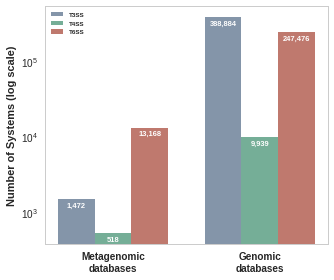

In [11]:
plt.style.use('seaborn-whitegrid')

def get_ordered_values(dict_of_values, labels):
    return list(dict(sorted(dict_of_values.items(), key=lambda x:{lbl:i for i, lbl in enumerate(labels, 1)}.get(x[0]))).values())

labels = ['Metagenomic', 'Genomic']
sys_res_lst = list()

sys_dic = {'T3SS':{'Metagenomic':T3SS_metagenomic_total, 
                   'Genomic':T3SS_genomic_total}, 
           'T4SS':{'Metagenomic':T4SSA_metagenomic_total + T4SSB_metagenomic_total, 
                   'Genomic':T4SSA_genomic_total + T4SSB_genomic_total},
           'T6SS':{'Metagenomic':T6SSi_metagenomic_total + T6SSiii_metagenomic_total, 
                   'Genomic':T6SSi_genomic_total + T6SSii_genomic_total + T6SSiii_genomic_total}}

T3SS_values, T4SS_values, T6SS_values = list(sys_dic.get('T3SS').values()), list(sys_dic.get('T4SS').values()), list(sys_dic.get('T6SS').values())
total_systems = sum(T3SS_values+T4SS_values+T6SS_values)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(4.75,4))
ax.bar(x - width, T3SS_values, width=width, label='T3SS', color='#8495a9')
ax.bar(x, T4SS_values, width=width, label='T4SS', color='#75ae97')
ax.bar(x + width, T6SS_values, width=width, label='T6SS', color='#bf796e')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Systems (log scale)', weight='bold')
ax.set_yscale('log')
plt.xticks(ticks=x, labels=['Metagenomic\ndatabases', 'Genomic\ndatabases'], weight='bold')
ax.legend(loc='upper left', 
          frameon=True,
          facecolor='white', 
          shadow=False, 
          labelspacing=.5, 
          framealpha=1, 
          edgecolor='white', 
          fancybox=False, 
          prop={'size':6.3, 'style': 'normal', 'weight':'bold'})

for i, pos in enumerate(x - width):
    plt.text(x=pos, y=T3SS_values[i]*.79, s='{:,}'.format(T3SS_values[i]), size=7.5, ha='center', color='white', fontdict={'weight':'bold'})
for i, pos in enumerate(x):
    plt.text(x=pos, y=T4SS_values[i]*.79, s='{:,}'.format(T4SS_values[i]), size=7.5, ha='center', color='white', fontdict={'weight':'bold'})
for i, pos in enumerate(x + width):
    plt.text(x=pos, y=T6SS_values[i]*.79, s='{:,}'.format(T6SS_values[i]), size=7.5, ha='center', color='white', fontdict={'weight':'bold'})

fig.tight_layout()
plt.grid(False)
plt.show()
fig.savefig(r'/davidb/yatirsolan/thesis_work/figures/figure2.svg', bbox_inches='tight')